<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_KNN_WEEK_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSESSMENT QUESTION**

Water transport is used for the carriage of people and goods over a body of water such as an ocean, sea, lake, river or canal. Besides being the largest carrier of freight in the world, water transport has made vacationing possible through the use of cruise ships. Water transport is considered a safer mode of transportation compared to others. Even though drowning incidents are rare, when they occur, the chances of survival are low. The main idea in this report is to look at such a  scenario where a drowning incident occured, measure and understand how different factors affect the survival rate.

**SPECIFYING THE QUESTION**

To show whether the different variables in our dataset affect the survival rate, and if they do, classify whether a passenger survived or not under the set conditions.

**DEFINING THE METRIC FOR SUCCESS**

We will focus on creating a model which classifiers the target variable with an accuracy score ranging between **75 to 90 percent**. We do not want an accuracy score lower than **75%** to avoid underfitting and also not higher than **90%** to prevent overfitting.

**UNDERSTANDING THE CONTEXT**

The task in hand is to look at the factors that affect whether or not a passenger survived. Using these factors, we will then create an effective model that can be used to classify whether a passenger survives or not.

**EXPERIMENTAL DESIGN**

We expect the following workflow:

* Data Cleaning and Preparation
  * Loading libraries and dataset
  * Deal with missing values
  * Deal with duplicated records
  * Check for outliers and anomalies
  * Check for multicollinearity
* Perform Exploratory Data Analysis
  * Univariate Analysis
  * Bivariate Analysis
* Creating our KNN model
* Conclusion

**DATA RELEVANCE**

The following are the columns we are going to use:

* PassengerId
* Survived - whether or not a passenger survived
* Pclass -the passenger class (1st,2nd,3rd)
* Name - name of the passenger
* Sex - the gender of the passenger
* Age
* SibSp - the number of siblings or spouse of the passenger
* Parch - number of parents or children
* Ticket
* Fare
* Cabin
* Embarked - where the passenger mounted the ship from




In [6]:
# Importing the libraries.

import pandas as pd
import numpy as np

In [7]:
# Loading our train dataset.

train=pd.read_csv('/content/train (5).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Loading our test dataset.

test=pd.read_csv('/content/test (1) (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# Previewing the top of our train dataset.

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Previewing the top of our test set.

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Determining the number of records in our train dataset.

train.shape

(891, 12)

In [12]:
# Determining the number of records in our test dataset.

test.shape

(418, 11)

In [13]:
# Checking the data types of our columns in our train dataset.

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# Checking the data types of our columns in our test dataset.

test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# Checking for null values in our train dataset.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a couple of missing values in our train dataset majority of them in the Cabin column and some in the Age column. For the Age column I will replace the missing values with the mean age of the passengers while for the Cabin column, we will not use it in our prediction and so we will drop it.

In [16]:
# Filling the missing values in the age column with the mean age.

train['Age']=train['Age'].fillna(train['Age'].mean())

In [17]:
# Checking for duplicates.

train.duplicated().sum()

0

In [18]:
# Checking for missing values in the test dataset.

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

I am going to do the same with the test dataset, fill the missing values in the age column with the mean age and drop the cabin column.

In [19]:
# Filling the missing values in the age column with the mean age.

test['Age']=test['Age'].fillna(test['Age'].mean())

In [20]:
# Checking for duplicates.

test.duplicated().sum()

0

To optimize our KNN algorithm, we will reduce the dimensions in our dataset by removing the redundant features. What we are going to do is first of all drop the cabin column in both datasets since it has a lot of missing values. We will also drop the PassengerId, Name, Ticket and Fare columns. These columns are not vital in predicting whether or not a passenger survived.

In [21]:
# Dropping the unnecessary features in our train dataset.

train.drop(['PassengerId','Cabin','Name','Ticket','Fare'], axis=1, inplace=True)


In [22]:
# Dropping the unnecessary features in our test dataset.

test.drop(['PassengerId','Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [23]:
# Changing our categorical column values to numerical values.

train['Sex']=pd.get_dummies(train['Sex'])
train['Embarked']=pd.get_dummies(train['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [24]:
test['Sex']=pd.get_dummies(test['Sex'])
test['Embarked']=pd.get_dummies(test['Embarked'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,0
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,0
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


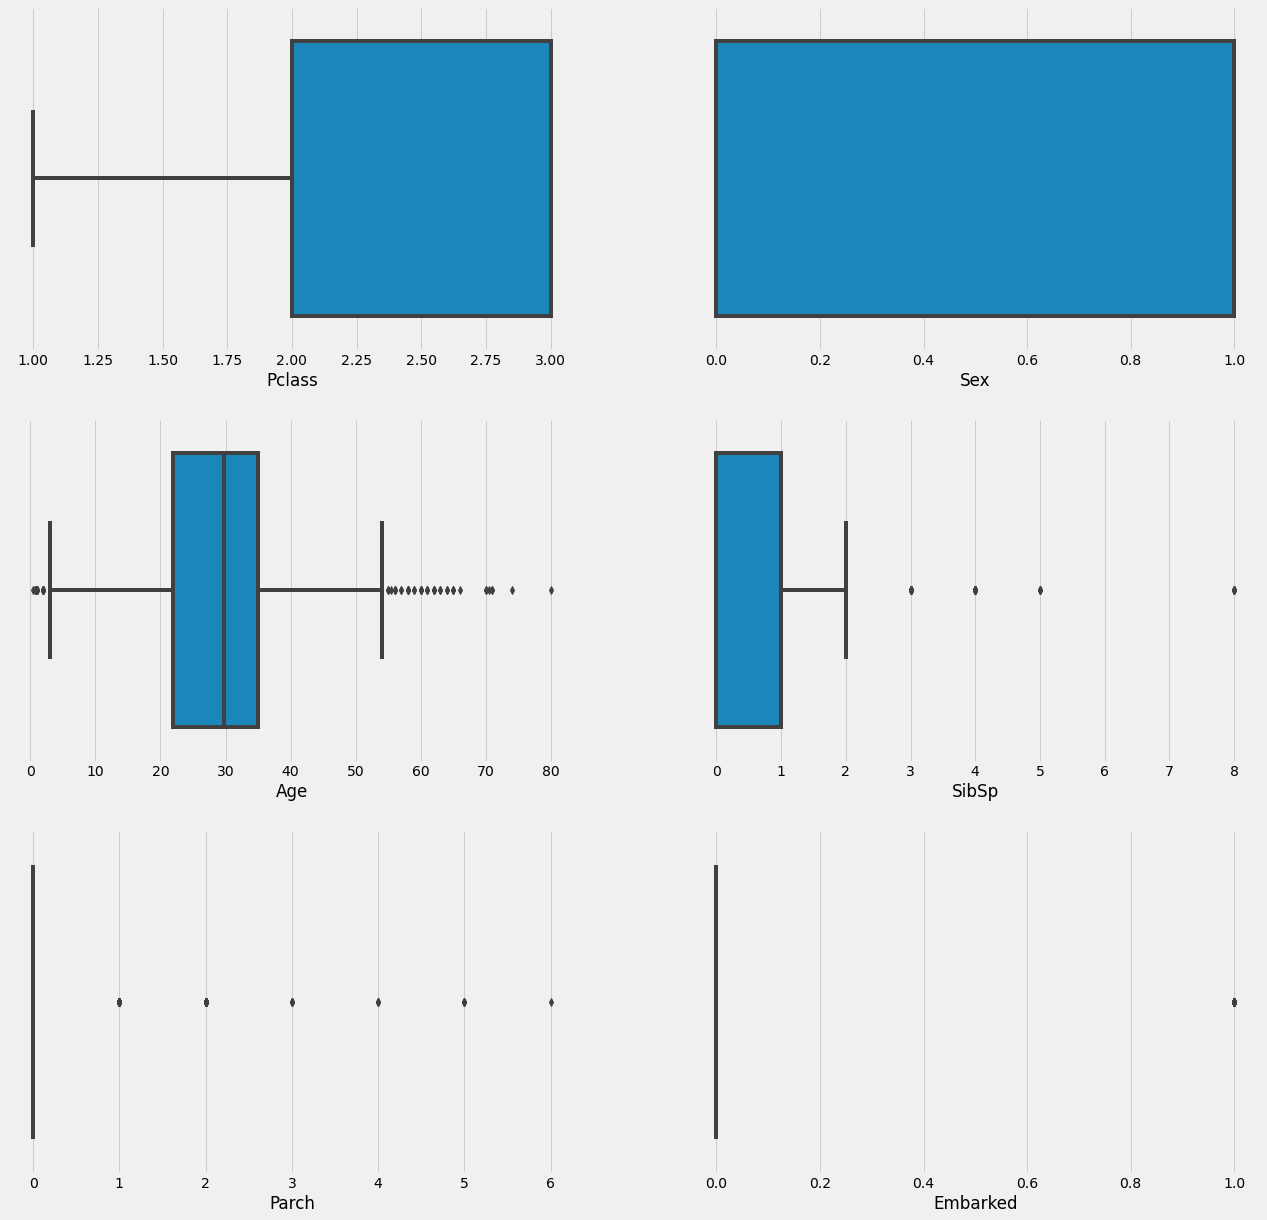

In [25]:
# Checking for outliers in our train dataset.

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
f, axes = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(data=train,x='Pclass', ax=axes[0,0])
sns.boxplot(data=train,x='Sex', ax=axes[0,1])
sns.boxplot(data=train,x='Age', ax=axes[1,0])
sns.boxplot(data=train,x='SibSp', ax=axes[1,1])
sns.boxplot(data=train,x='Parch', ax=axes[2,0])
sns.boxplot(data=train,x='Embarked', ax=axes[2,1])

KNN algorithm can be affected by outliers if we use a small K value. This is not a major problem because using large K values can smoothen the algorithm. Dropping the outliers will also remove some key values in our predictor variables. We will therefore keep the outliers.

Another way we can improve our KNN model performance is by removing the dependent features. 

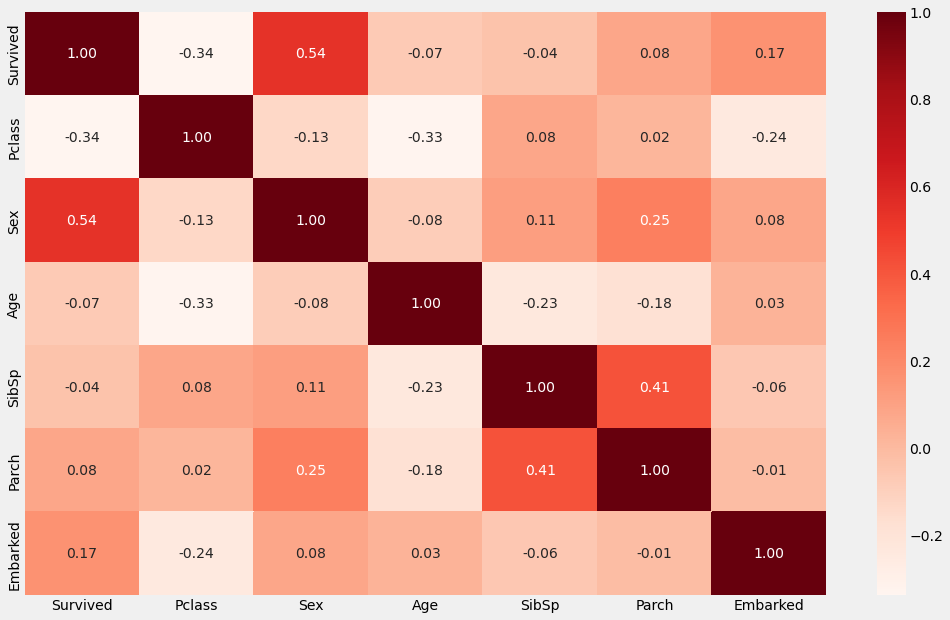

In [26]:
# Checking for multicollinearity.

plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From our heatmap, our variables have a weak correlation with each other. Therefore, there is no need of dropping any of the features since they are independent of each other.

We can confirm this by looking at the VIF scores which tells us about the collinearity of our features. We can see below that our features are not correlated at all since the highest VIF scores is about 2 and that is if it is rounded off. Still, a VIF score of 2 is still a very low correlation.

In [27]:
correlations =train.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.656598,0.501813,-0.832829,0.257009,0.148983,0.043261,-0.086500
Pclass,0.501813,1.377638,-0.081114,0.489054,0.027352,0.032528,0.243790
Sex,-0.832829,-0.081114,1.517421,-0.026582,-0.091594,-0.269941,-0.012932
Age,0.257009,0.489054,-0.026582,1.246691,0.219156,0.109587,0.052281
SibSp,0.148983,0.027352,-0.091594,0.219156,1.264598,-0.474935,0.052182
Parch,0.043261,0.032528,-0.269941,0.109587,-0.474935,1.278854,0.005375
Embarked,-0.086500,0.243790,-0.012932,0.052281,0.052182,0.005375,1.076428


We do not need to normalize our target variabel(Survived) since KNN does **not** make the assumption that the target variable is normally distributed. We can however rescale our features to take our outliers into account. In our case, we are going to rescale only the age column because it has a higher variance and also many outliers.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

train[['Age']]=scaler.fit_transform(train[['Age']])

**Using 80% of our train dataset for training our model and 20% for testing our model's accuracy.**

In [29]:
# Now we can split our dataset into our training and test sets.

from sklearn.model_selection import train_test_split

X=train.drop('Survived',axis=1)
y=train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=0)

We then perform a Grid Search to find the best value for K.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [31]:
# Finding the best parameter.

print(CV_classifier.best_params_)

{'n_neighbors': 22}


In [32]:
# We will now fit our KNN model using the best n_neighbors parameter we found.

classifier=KNeighborsClassifier(n_neighbors=22)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [33]:
# Now for our prediction.

y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7988826815642458
[[97 13]
 [23 46]]


We have used the train set for our prediction and got an **79.9%** accuracy score. This is a really good model accuracy because our model does not underfit or overfit our training data. Our confusion matrix gives us **143** correct predictions and **36** incorrect predictions. The number of incorrect predictions are not too high and also not too low, indicating a good balance between bias and variance. We will now use this model in the test dataset to make predictions.

In [35]:
# Standardizing our age column in our test dataset as we did in our train dataset and then making our predictions
# using the model we just created.

test[['Age']]=scaler.fit_transform(test[['Age']])
y_pred=classifier.predict(test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Using 70% training data and 30% testing data.**

In [36]:
# Splitting our train and test sets.

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.3, random_state=0)

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [37]:
# Finding the best parameters.

print(CV_classifier.best_params_)

{'n_neighbors': 20}


In [38]:
# Building our classification model using the best parameter we found.

classifier=KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
# Making our predictions.

y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [40]:
# Checking our model's accuracy and the number of correct and incorrect predictions.

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7985074626865671
[[146  22]
 [ 32  68]]


Using a 70-30 set, our model accuracy is almost the same, if not the same, as  the 80-20 set. However the number of incorrect predictions increases. In this case, the model accuracy is **79.9%** and the number of correct predictions are **214** while the number of incorrect predictions are **54**.

**Using 60% train data and 40% testing data.**

In [41]:
# Splitting the training and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.4, random_state=0)

# Creating a parameter grid for the best K value we will use.
param_grid={
    'n_neighbors':[2,4,6,8,10,12,14,16,18,20,22,26,28,30,32,34,36,38,40]
}

# Building our GridSearch model to find the best parameter.
classifier=KNeighborsClassifier()

CV_classifier=GridSearchCV(estimator=classifier, param_grid=param_grid,cv=5)
CV_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         26, 28, 30, 32, 34, 36, 38, 40]})

In [42]:
# Finding the best parameter.

print(CV_classifier.best_params_)

{'n_neighbors': 18}


In [43]:
# Fitting our classification model.

classifier=KNeighborsClassifier(n_neighbors=18)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [44]:
# Making our prediction.

y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [45]:
# Checking our models accuracy and the number of correct and incorrect predictions.

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7899159663865546
[[196  25]
 [ 50  86]]


In our 60-40 set, the accuracy score slightly decreases and the number of incorrect predictions increase. We have an accuracy score of about **79%**, **75** incorrect predictions and **282** correct predictions.

Another thing to note is that the accuracy score tends to decrease as we decrease the training set size. This is because as we decrease the size of our training set, the model gains less information about the data and therefore its accuracy in making predictions decreases.

**RECOMMENDATION**

Besides rescaling and removing the redundant features as we have done, we can perform further dimensionality reduction using techniques such as Linear Discriminant Analysis which will only give us the main key variables to use in our classification. This would help make the distance metric in our KNN model more meaningful.

**CONCLUSION**

From our accuracy scores, we can say that we have effective and optimal models to use in predicting unseen data since neither of the sets underfit nor overfit our training data. Even though the different sets have no significant difference in terms of accuracy, we should go with the model with an accuracy score close to 80%. In our case, the 80-20 set would be our best model.